In [61]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.time as Time
import astropy.units as u
import healpy as hp
import ligo.skymap.plot
import ephem
from matplotlib.gridspec import GridSpec

In [2]:
sun = ephem.Sun()

In [3]:
t0 = Time.Time('2019-01-01', scale='utc')

In [4]:
times = t0 + np.arange(53)*7*u.day

In [5]:
ra, dec = [], []
for i in range(53):
    sun.compute(times[i].value)
    ra.append(sun.ra)
    dec.append(sun.dec)

In [6]:
ra = np.array(ra)
dec = np.array(dec)

In [21]:
nside = 256
npix = hp.nside2npix(nside)
m = np.zeros(npix)

theta = np.pi/2-dec
phi = ra
for i in range(53):
    vec = hp.ang2vec(theta[i],phi[i])
    sun = hp.query_disc(nside, vec, radius=np.deg2rad(0.5))
    m[sun] = 1

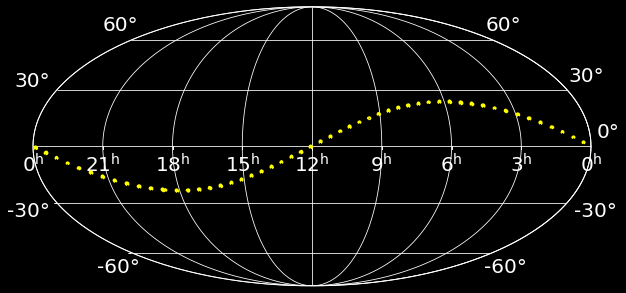

In [110]:
plt.style.use('dark_background')
plt.rcParams["font.size"] = 20
fig = plt.figure(figsize=(10,10))

ax = plt.axes(figure = fig, projection='astro hours mollweide')
ax.contour_hpx(m, levels=[0.5], colors=['yellow'], linewidths=[3])
ax.grid()
plt.savefig('/home/vedant/krittika/Mollweide.jpg', bbox_inches='tight')

In [102]:
plt.contour?

In [76]:
sun = coord.SkyCoord(ra = ra*u.rad, dec=dec*u.rad)

In [36]:
location = coord.EarthLocation(lat = 19.1334*u.deg, lon = 72.9133*u.deg, height = 0*u.m)

In [37]:
obstimes = times

In [40]:
sun_alt = sun.transform_to(coord.AltAz(obstime=obstimes, location=location))

In [44]:
alt = sun_alt.alt.value

In [45]:
az = sun_alt.az.value

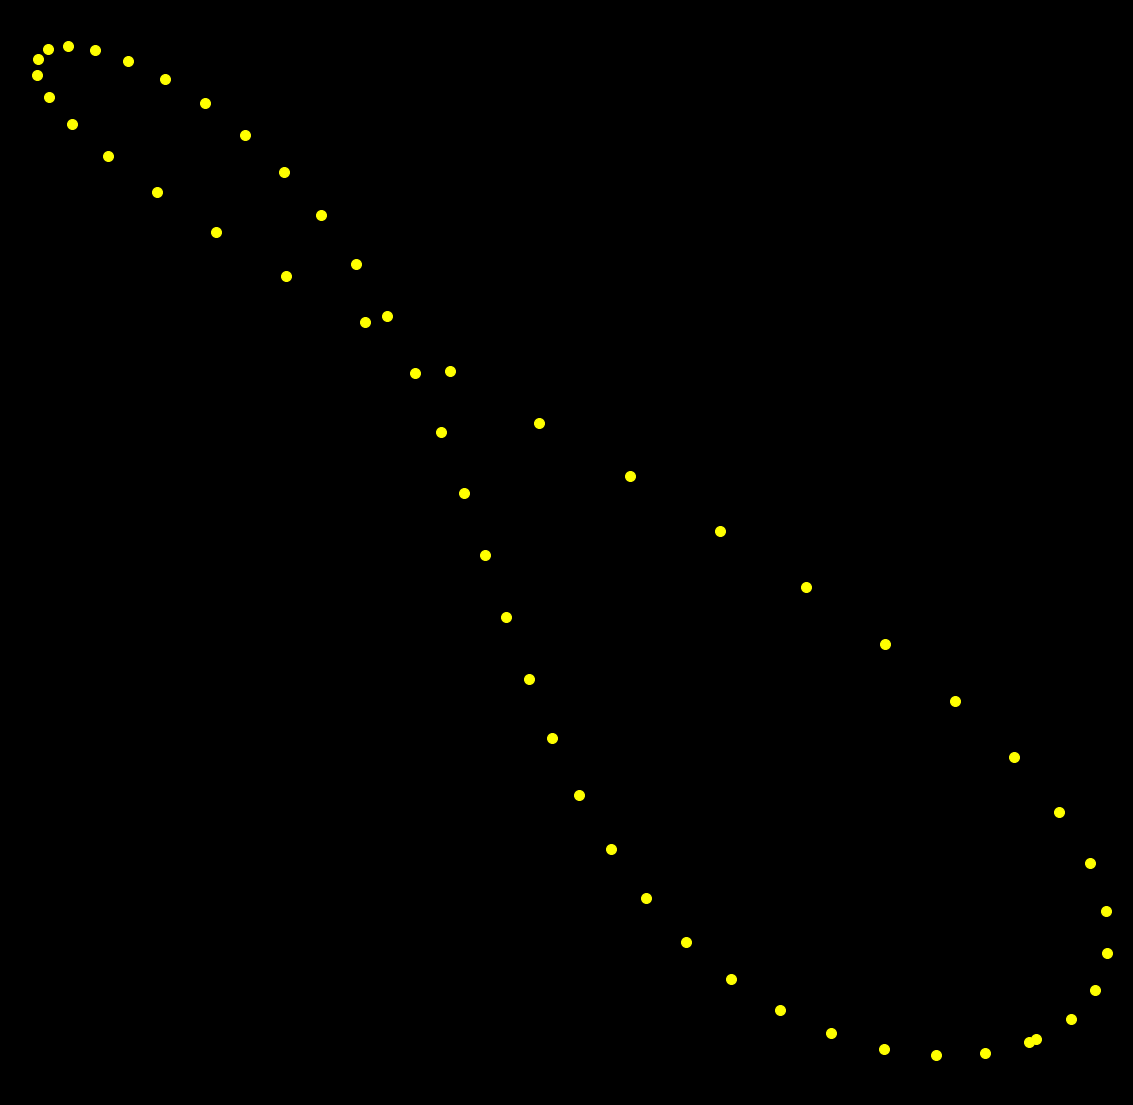

In [131]:
plt.figure(figsize=(20,20))
ax = plt.gca()
for i in ['left','right','top','bottom']:
    ax.spines[i].set_color('k')
plt.scatter(alt, az, s=100, color='yellow')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.ylim(110,60)
plt.xlim(-7,-25)
plt.savefig('/home/vedant/krittika/Analemma.jpg', bbox_inches='tight')

In [95]:
alt.max()

-7.429981787620091

In [96]:
alt.min()

-24.686524051781607

In [97]:
alt.max()-alt.min()

17.256542264161517

In [99]:
(az.max()-az.min())/2

23.201497085939135